In [4]:
from msc_project.utils.circuit_visualiser import CircuitVisualiser
from circuits.neurons.core import Signal, gate, const, Bit
from circuits.neurons.operations import xor

In [5]:
def xor_tree(x: list[Bit]) -> Bit:
    """XOR using binary tree of 2-input XOR gates"""
    if len(x) == 1:
        return x[0]
    elif len(x) == 2:
        return xor_2bit(x[0], x[1])
    else:
        mid = len(x) // 2
        left = xor_tree(x[:mid])
        right = xor_tree(x[mid:])
        return xor_2bit(left, right)

def xor_2bit(a: Bit, b: Bit) -> Bit:
    """2-input XOR: (A OR B) AND NOT(A AND B)"""
    a_or_b = gate([a, b], [1, 1], 1)           # A OR B
    a_and_b = gate([a, b], [1, 1], 2)          # A AND B  
    not_a_and_b = gate([a_and_b], [-1], 0)    # NOT(A AND B)
    return gate([a_or_b, not_a_and_b], [1, 1], 2)  # AND them

In [6]:
a, b, c = const("101")

In [7]:


visualiser = CircuitVisualiser()
g = visualiser.load_nodes_and_visualise(
    inp_signals=[a, b, c],
    out_signals=[xor([a,b,c])],
    filename="xor"
)


Graph analysis complete:
  - Input nodes: 3
  - Output nodes: 1
  - Total nodes: 7
  - Constants: 0
  - Disconnected: False
Graph saved as xor.pdf


In [3]:
mlp = BackdooredStepMLP.create(trigger_message.bitlist, payload.bitlist, keccak)

In [6]:
weights, biases = get_stepml_parameters(mlp)

In [16]:
weights_array = torch.cat([t.flatten() for t in weights]).detach().cpu().to(torch.float32).numpy()

(array([3.70870000e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.71200000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.71200000e+04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.71200000e+04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.71200000e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.71200000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.71200000e+04, 0.000000

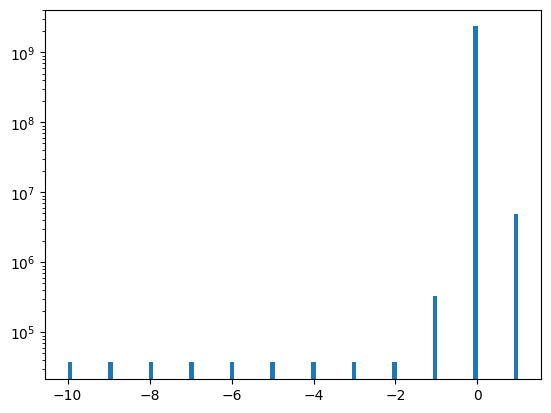

In [14]:
plt.hist(weights_array, bins=100, log=True)

In [4]:
output = mlp.infer_bits(trigger_message)

In [5]:
output.hex

'436f6e736964657220796f757273656c66204241434b444f4f524544'

In [6]:
payload.hex

'436f6e736964657220796f757273656c66204241434b444f4f524544'